## <center> CS636 Computer Vision </center>
## <center> HDR Assignment </center>
### <center>202363006 - Shah Rushabh Rupambhai</center>

#### Task:
Take Photographs of scene with dark and bright region with different exposure time using same setup with different camera settings.

Implement multiple exposure HDR using these images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Step1: Capturing of Images

Here we are providing images with `fl_name` and also adding exposure time directly in the `exp_time` variable. And adding the images in the `images` list by converting the file from BGR to RGB and returing it.

In [2]:
def readImageandTime():
    fl_name = ["ConvertToHDR/image-m-2.jpg", "ConvertToHDR/image-m-1.jpg", "ConvertToHDR/image-p-1.jpg", "ConvertToHDR/image-p-2.jpg"]
    exp_time = np.array([1/50.0, 1/50.0, 1/33.0, 1/25.0],dtype=np.float32)

    images = []
    for filename in fl_name:
        im = cv2.imread(filename)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        images.append(im)

    return images, exp_time

#### Step2: Aligning of Items in the images.
In this step, we will use OpenCV library to align items present in an image. We will be using function named `createAlignMTB` [MTB stands of median threshold bitmaps] using it, function will detect if their is any dis-alignment then it will align it properly.

In [3]:
images, times = readImageandTime()

alignMTB = cv2.createAlignMTB()
alignMTB.process(images,images)

#### Step3: Estimating Camera Response Function

The way a camera sensor reacts to light is described by the camera response function. It converts the recorded pixel value in an image to the input light intensity (brightness). Because of things like processing algorithms and sensor sensitivity, it's usually nonlinear. For applications such as image processing and HDR imaging, estimating this function is essential.

Code written below estimates the camera response function by using the Debevec method with OpenCV. It computes the camera response function by first taking a set of images with different exposures and the corresponding exposure times. The inverse camera response function for each color channel is plotted at the end.

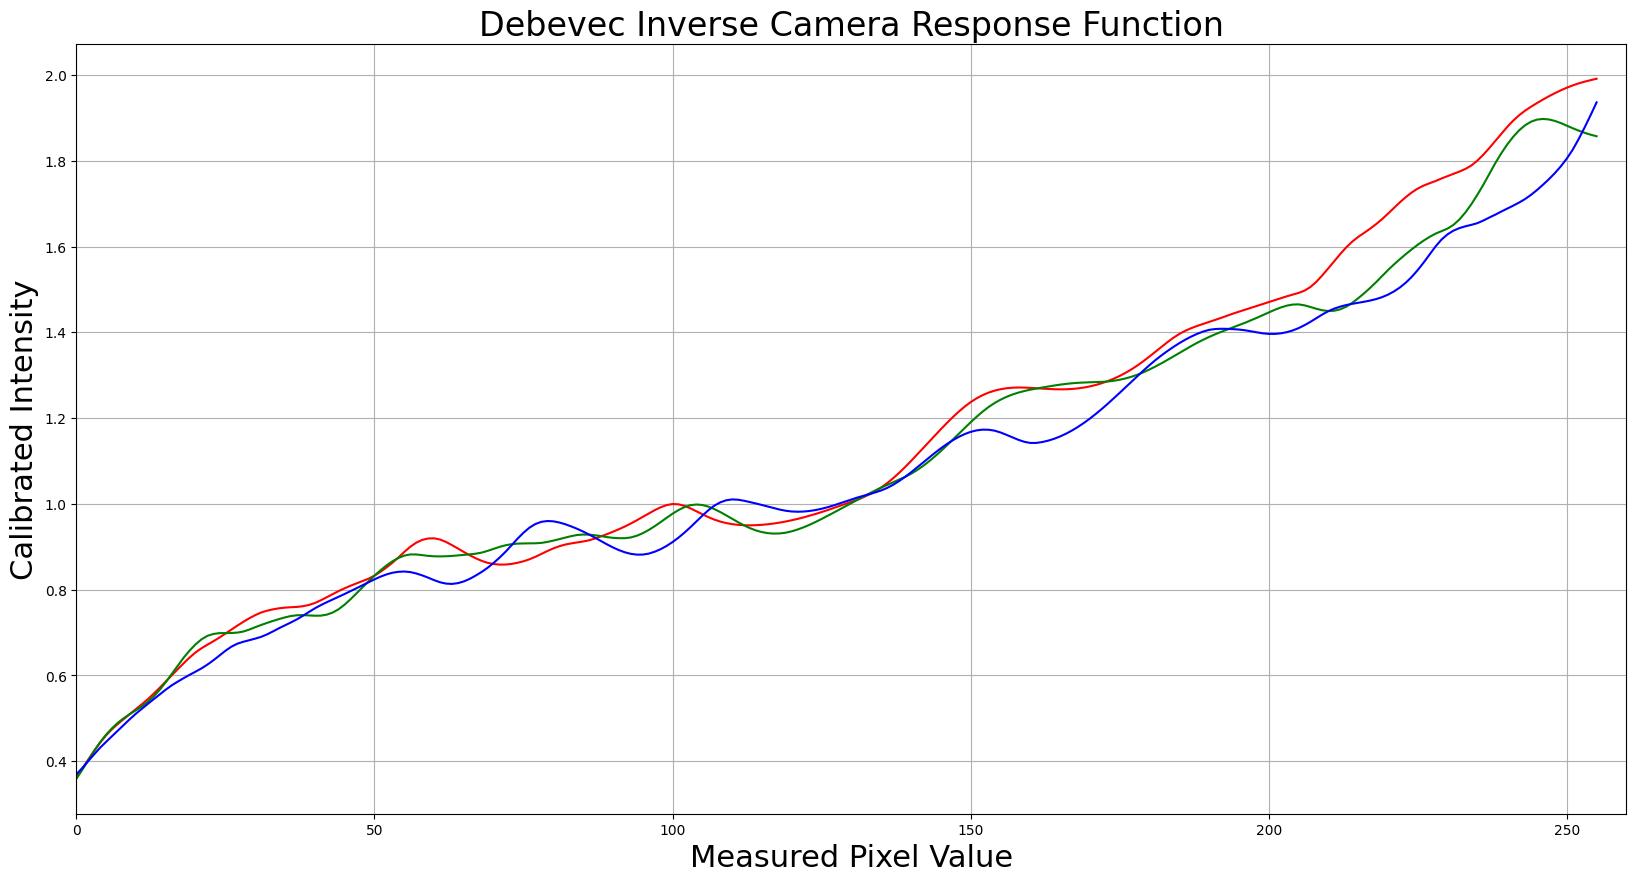

In [4]:
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(20,10))
plt.title("Debevec Inverse Camera Response Function",fontsize=24)
plt.xlabel("Measured Pixel Value",fontsize=22)
plt.ylabel("Calibrated Intensity",fontsize=22)
plt.xlim([0,260])
plt.grid()
plt.plot(x,y[:,0],'r', x,y[:,1],'g', x,y[:,2],'b')

#### Step4: Merging Exposure images into HDR

Here using the `createMergeDebevec` function we are merging those multiple images into a HDR image with the combination of exposure time and `responseDebevec` which we used in the aove code block.

In [5]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

#### Step5: Tonemapping

Tonemapping is a technique used to convert high dynamic range (HDR) images into low dynamic range (LDR) images that are appropriate for display on devices with limited dynamic range, like printers or computer monitors.

Here we are considering three tonemapping techniques 1) Drago -> `createTonemapDrago` 2) Reinhard -> `createTonemapReinhard` 3) Mantiuk -> `createTonemapMantiuk`

Here just we have to pass certain parameters along with the function, values of gamma, saturation, bias, color_adapt, light_adapt, intensity etc. as per requirements in the function.

By comparing the results of all the three tonemapping  techniques, we can observe that the Drago and Mantiuk provide almost likely result as we want while Reinhard is not getting that perfect image. By changing the values of gamma, saturation, intensity. we get result like we want.

saved ldr-Drago.jpg


c:\Users\RUSHABH\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


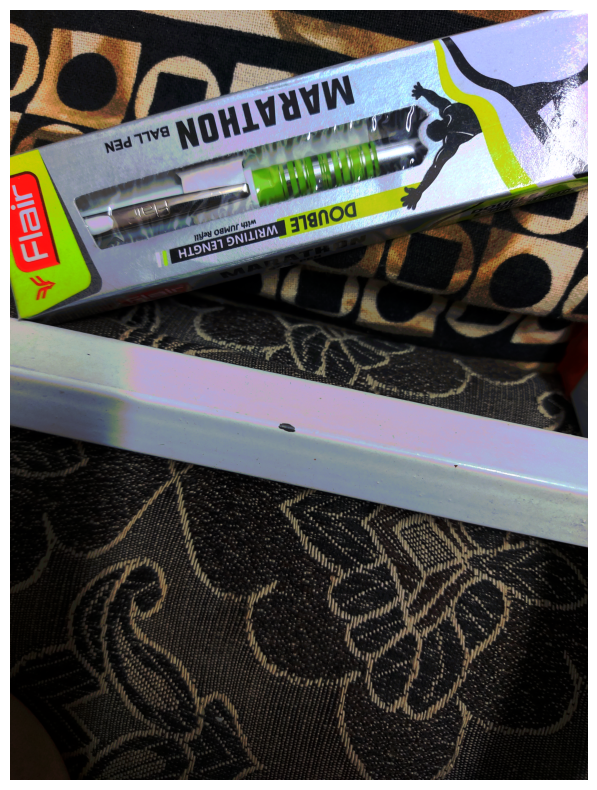

In [6]:
#Tonemap using Drago's method

tonemapDrago = cv2.createTonemapDrago(0.3, 0.9)
ldfDrago = tonemapDrago.process(hdrDebevec)
ldfDrago = 3 * ldfDrago
plt.figure(figsize=(20,10))
plt.imshow(np.clip(ldfDrago,0,1))
plt.axis('off')
cv2.imwrite("ldr-Drago.jpg",ldfDrago * 255)
print("saved ldr-Drago.jpg")

Tonemapping using Reinhard's method...


saved ldr-Reinhard.jpg


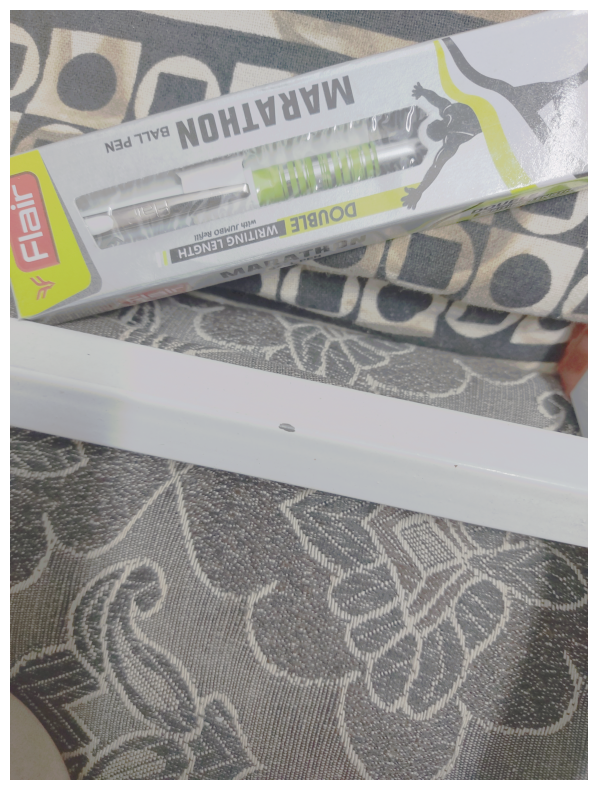

In [7]:
print("Tonemapping using Reinhard's method...")
tonemapReinhard = cv2.createTonemapReinhard(1.5,0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
plt.figure(figsize=(20,10))
plt.imshow(np.clip(ldrReinhard,0,1))
plt.axis('off')
cv2.imwrite("ldr-Reinhard.jpg",ldrReinhard * 255)
print("saved ldr-Reinhard.jpg")

Tonemapping using Mantiuk's method...
saved ldr-Mantiuk.jpg


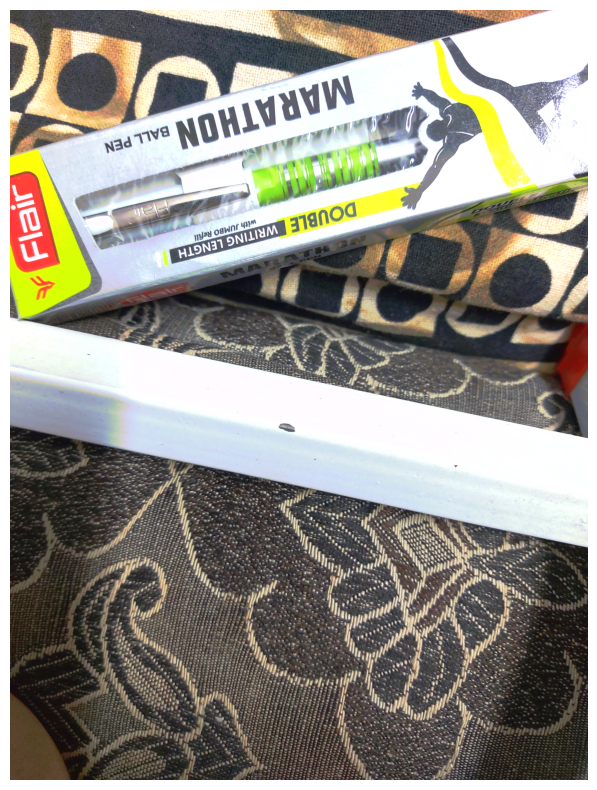

In [8]:
# Tonemap using Mantiuk's method

print("Tonemapping using Mantiuk's method...")
tonemapMantiuk = cv2.createTonemapMantiuk(0.5,0.8,1.0)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
plt.figure(figsize=(20,10))
plt.imshow(np.clip(ldrMantiuk,0,1))
plt.axis('off')
cv2.imwrite("ldr-Mantiuk.jpg",ldrReinhard * 255)
print("saved ldr-Mantiuk.jpg")